<a href="https://colab.research.google.com/github/Tanisha2910/Data-Science-Python/blob/master/TreeModelVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How to visualize a tree model multiclass classification**

In [0]:
# Load libraries

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus  # PyDotPlus is an improved version of the old pydot project that provides a Python Interface to Graphviz’s Dot language


In [4]:
# Load the wine datasets
dataset = datasets.load_wine()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Fit a tree.decision tree classifier to the data
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [0]:
# make predictions
expected_y = y_test
predicted_y = model.predict(X_test)

In [6]:
# summarize the fit of the model
print("tree.DecisionTreeClassifier():")
print(metrics.classification_report(expected_y, predicted_y))


tree.DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.81      0.93      0.87        14
           2       0.90      0.82      0.86        11

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



In [11]:
# create a dot file
from sklearn.externals.six import StringIO
dotfile = open("tree.dot", 'w')
tree.export_graphviz(model, out_file = dotfile, feature_names = dataset.feature_names)
dotfile.close()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [14]:
# Create a pdf and a png from a dot file
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True, feature_names = dataset.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")
graph.write_pdf("tree.pdf")


True

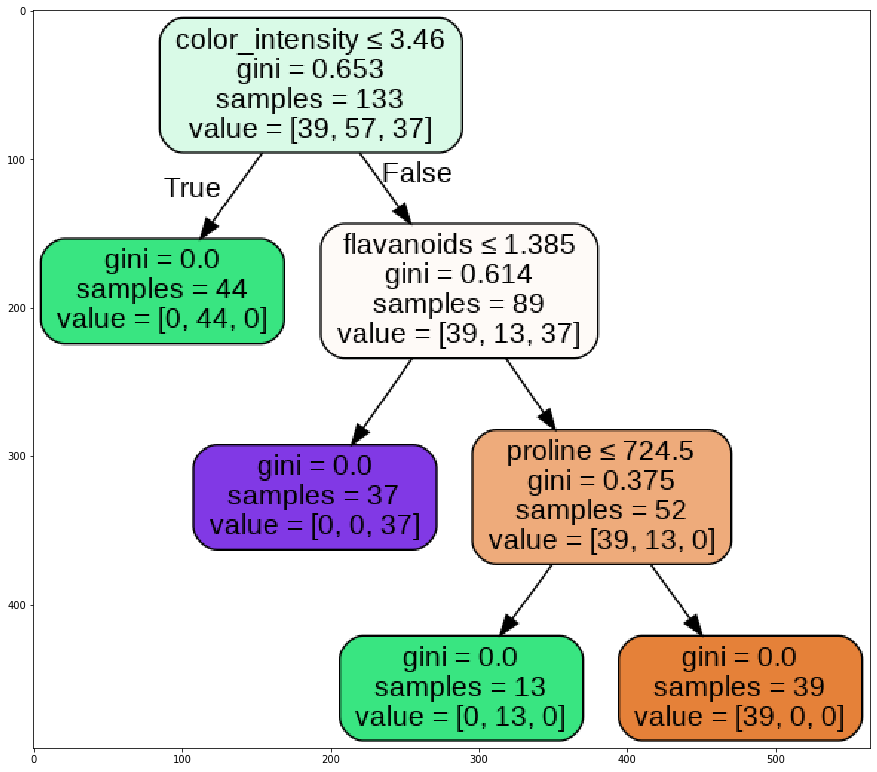

In [16]:
import matplotlib.image as mpimg
img = mpimg.imread('tree.png')
#img = misc.imread("tree.png")
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()